# Gaussian RBF Kernel

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs, make_moons
from matplotlib import style
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

In [11]:
X, y = make_moons(n_samples=2000, noise=0)

In [12]:
X[0:10]

array([[ 1.20760408, -0.47821294],
       [ 0.29344935, -0.20766248],
       [ 0.77406922,  0.63310098],
       [ 1.94998187,  0.18769496],
       [ 1.90329482,  0.07097965],
       [ 1.62454294, -0.28099047],
       [ 0.17502866, -0.06517457],
       [-0.81416117,  0.58063895],
       [-0.99992089,  0.01257862],
       [ 1.99987639,  0.48427696]])

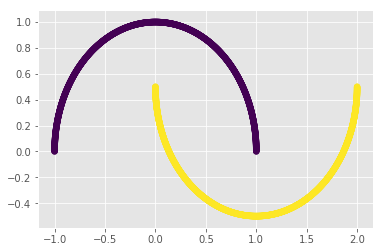

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [14]:
# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
                        alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1], 
                s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

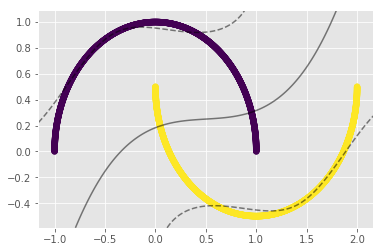

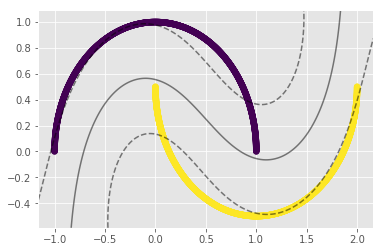

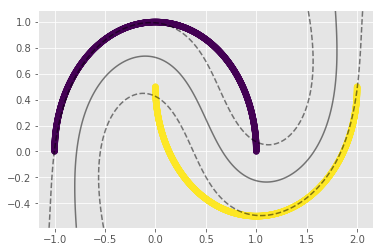

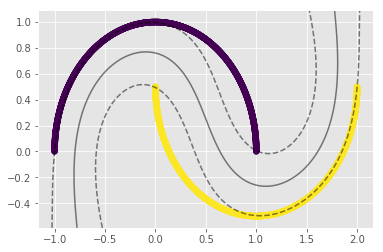

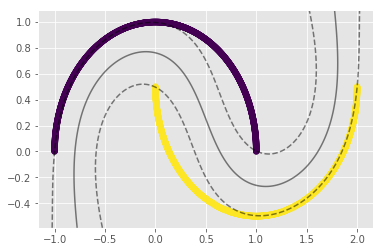

0.902
1.0
1.0
1.0
1.0


In [15]:
clf_arr = []
clf_arr.append(draw_svm(X, y, 0.01))
clf_arr.append(draw_svm(X, y, 0.1))
clf_arr.append(draw_svm(X, y, 1))
clf_arr.append(draw_svm(X, y, 10))
clf_arr.append(draw_svm(X, y, 20))

for i, clf in enumerate(clf_arr):
    print(clf.score(X, y))